# Multiple Linear Regression Task (from scratch) -

## Using Polynomial Features and Regularisation
We need to predict the weight of the fish, given the features below.

There are 7 different species of fishes!!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
fish = pd.read_csv('Fish.xls')

In [5]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


# Description of the features - columns
    Length 1 - vertical length in cm
    Length2 - diagonal length in cm
    Length3 - cross length in cm
    height - height in cm
    width - diagonal width in cm

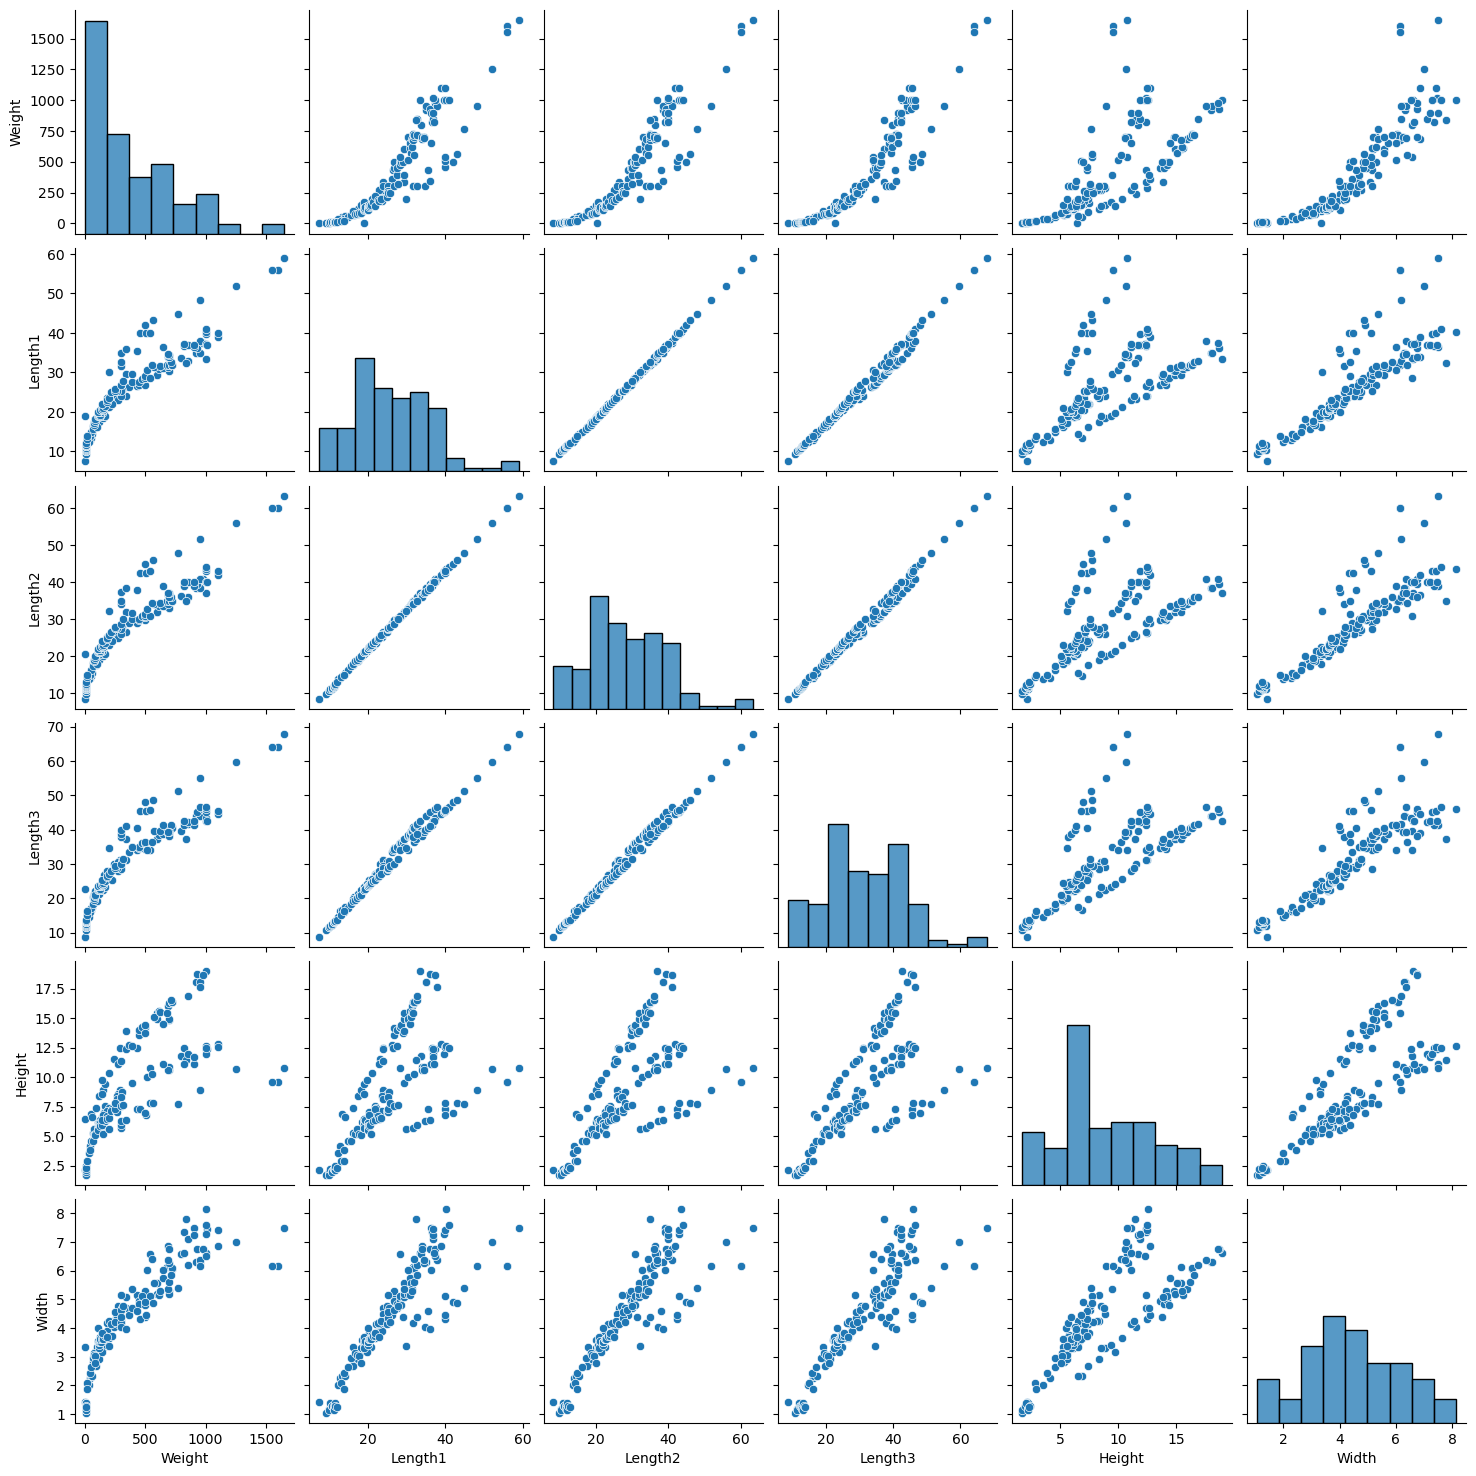

In [7]:
sns.pairplot(fish)

It's clearly visible from the graphs above that there is not a strict linear relationship of weight with other features.

With almost all the features, there seems to be a polynomial relation evident!!

# Let's predict Weight using just one feature - length1

This will give me some practice with a simpler model. And then I can apply the same learnings to all the different features!


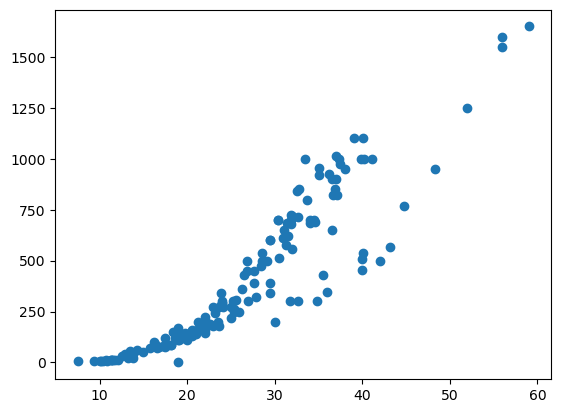

In [8]:
# Let's zoom in on their relation!
plt.scatter(fish['Length1'],fish['Weight'])

In [10]:
# We need a model that fits a curve to the above data. And thus we would need to use polynomial regression

# Polynomial Regression

I am not gonna do a train test split here!! I am just trying to arrive at a curve that further minimises the cost!!

In [21]:
# Let's define a function that predicts y, given x and paramters w and w

def predict_y(X, w, b):
    y = np.zeros(X.shape[0])
    for i in range(X.shape[0]):   
        y[i] += np.dot(w, X[i]) + b
    return y

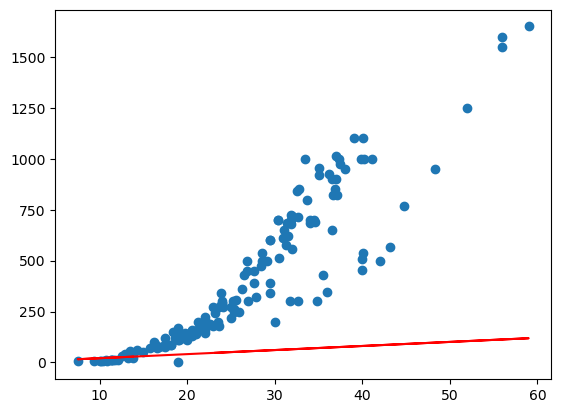

In [23]:
# Let's plot the linear regression line using random values for w and b

plt.scatter(fish['Length1'],fish['Weight'])
plt.plot(fish['Length1'], predict_y(fish['Length1'],2,1), c='r')

We need to improve this red line to the point that it is able to predict Weight as accurately as possible

and for that we would need to do not just linear regression, but polynomial regression!!

# Feature engineering!
Let's engineer a few polynomial features of x that we will use in our model to make predictions

I know we can do this quite easily using sklearn library (from sklearn.preprocessing import PolynomialFeatures)
- But why not just do everything from scratch!!

In [26]:
x1 = fish['Length1']
x2 = x1**2
x3 = x1**3

In [34]:
X_train = np.c_[x1,x2,x3]

In [35]:
y_train = fish['Weight']

In [31]:
# So we have 3 features now (x, x squared and x cubed). Each will have their own weights!!

# Let's run gradient descent 
- to find the best values for parameters w and b given this data

In [33]:
def compute_cost(X, y, w, b):
    cost = 0
    m, n = X.shape
    
    for i in range(m):
        f_wb_i = np.dot(w, X[i]) + b
        err = (f_wb_i - y[i]) ** 2
        cost += err
    total_cost = cost / (2 * m)
    return total_cost

In [37]:
compute_cost(X_train, y_train, [0,0,0], 0)

143003.22141509436

In [38]:
def compute_gradient(X, y, w, b):
    m,n = X.shape
    dj_dw = np.zeros(n)
    dj_db = 0
    
    for i in range(m):
        err = np.dot(w, X[i]) + b - y[i]
        for j in range(n):
            dj_dw[j] += err * X[i,j]
        
        dj_db += err
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

In [39]:
compute_gradient(X_train, y_train, [0,0,0], 0)

(array([-1.37112145e+04, -5.08528836e+05, -2.02614916e+07]),
 -398.3264150943396)

In [53]:
def gradient_descent(X, y, w_init, b_init, alpha, num_iters, cost_function, gradient_function):
    
    J_history = []
    w = w_init
    b = b_init
    
    for i in range(num_iters):
        cost = cost_function(X, y, w, b)
        dj_dw, dj_db = gradient_function(X, y, w, b)
        
        J_history.append(cost)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i%1000 == 0:
            print(f"Iteration: {i}, cost: {cost}, w: {w}, b: {b}")
    return w, b, J_history
        

# Let's normalise the data first
- z score normalisation

In [54]:
def zscore_normalise(X):
    mu = np.mean(X, axis=0)
    
    sigma = np.std(X, axis=0)
    
    X_norm = (X - mu)/sigma
    return X_norm, mu, sigma

In [55]:
X_norm, X_mu, X_sigma = zscore_normalise(X_train)

# Gradient Descent Time!


In [56]:
alpha = 0.3
iterations = 10000
initial_w = np.zeros(X_norm.shape[1])
initial_b = 0

w_final, b_final, J_hist = gradient_descent(X_norm,y_train,initial_w,initial_b, alpha,iterations,compute_cost,compute_gradient)

Iteration: 0, cost: 143003.22141509436, w: [98.03174385 97.58675939 92.04990475], b: 119.49792452830188
Iteration: 1000, cost: 9619.034485204696, w: [135.6452819  270.2866813  -79.06480303], b: 398.3264150943395
Iteration: 2000, cost: 9536.296845802266, w: [  73.97316614  397.43340483 -147.79584005], b: 398.32641509433955
Iteration: 3000, cost: 9485.12487023044, w: [  25.47186642  497.42642877 -201.84854418], b: 398.3264150943396
Iteration: 4000, cost: 9453.475779165768, w: [ -12.67140216  576.06474958 -244.35764854], b: 398.3264150943396
Iteration: 5000, cost: 9433.901296179194, w: [ -42.6687207   637.90891887 -277.78842654], b: 398.3264150943396
Iteration: 6000, cost: 9421.794775223869, w: [ -66.25975402  686.54552804 -304.0796631 ], b: 398.32641509433967
Iteration: 7000, cost: 9414.307075561896, w: [ -84.81264074  724.79520912 -324.75609245], b: 398.32641509433967
Iteration: 8000, cost: 9409.676046843178, w: [ -99.40333718  754.87621451 -341.01682365], b: 398.32641509433967
Iteratio

# Let's plot these on the graph we had made originally
- using the discovered values of w and b

<AxesSubplot:xlabel='Length1'>

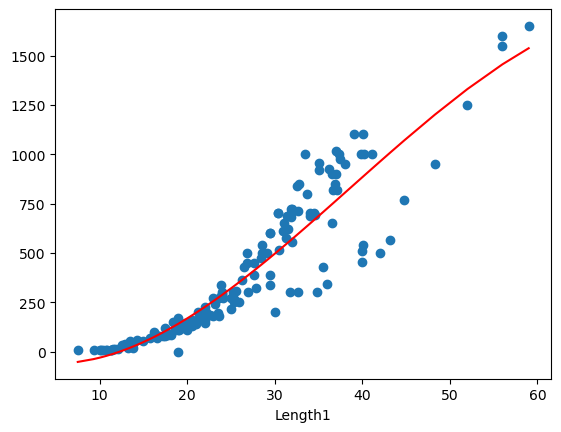

In [69]:
fig, ax = plt.subplots(1, 1)

ax.scatter(fish['Length1'],fish['Weight'])

sns.lineplot(x= fish['Length1'],y = predict_y(X_norm,w_final,b_final),color='r')

# Awesome! This seems to fit the data well
- But what if we engineered even more features, 
- would we be over fitting? let's check

In [70]:
x4 = x1**4
x5 = x1**5
x6 = x1**6
x7 = x1**7
x8 = x1**8
x9 = x1**9
x10 = x1**10
x11 = x1**11

In [71]:
X_train2 = np.c_[x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11]

In [78]:
X_norm2, X2_mu, X2_sigma = zscore_normalise(X_train2)

In [84]:
alpha = 0.1
iterations = 20000
initial_w = np.zeros(X_norm2.shape[1])
initial_b = 0

w_final, b_final, J_hist = gradient_descent(X_norm2,y_train,initial_w,initial_b, alpha,iterations,compute_cost,compute_gradient)

Iteration: 0, cost: 143003.22141509436, w: [32.67724795 32.5289198  30.68330158 28.09691117 25.55136962 23.41832269
 21.76142836 20.51022025 19.56515284 18.83844747 18.26346639], b: 39.83264150943396
Iteration: 1000, cost: 9179.463872694489, w: [125.59025838 204.86502648 114.96937502  -4.34969307 -78.18756095
 -95.72040214 -73.64620884 -31.71727979  15.57333682  59.62265412
  96.18751304], b: 398.3264150943393
Iteration: 2000, cost: 8984.667813554139, w: [  58.70096816  274.37158388  170.75235277   -5.42441736 -117.68117449
 -142.59908088 -106.49958356  -42.07437217   26.68628676   85.85625572
  128.98513768], b: 398.3264150943394
Iteration: 3000, cost: 8882.508897342685, w: [   9.76158222  328.6921153   209.78966629  -11.27693832 -149.99095497
 -175.86688265 -125.39420807  -42.92187574   39.59582401  104.17333983
  143.06773308], b: 398.3264150943394
Iteration: 4000, cost: 8822.272477431976, w: [ -26.99882687  372.73067945  237.55403952  -20.31492609 -177.47514567
 -200.04922758 -135.

<AxesSubplot:xlabel='Length1'>

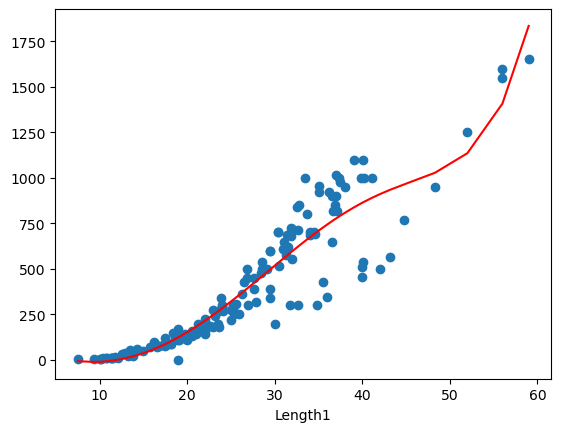

In [85]:
# Let's plot this against the original data to see the shape of the curve!

fig, ax = plt.subplots(1, 1)

ax.scatter(fish['Length1'],fish['Weight'])

sns.lineplot(x= fish['Length1'],y = predict_y(X_norm2,w_final,b_final),color='r')

# Clearly we are overfitting here!!
- That's why we need regularisation!!
- Let's take the same number of features (till x to the power 11) but this time, let's regularise them

- Regularisation will hopefully diminish the impact of not so important features by penalising them and reduce variance, thus ultimately reducing overfitting of the model!!

# Regularisation!

In [86]:
# We need to have a new cost function that takes into account the regularisation term

In [88]:
def compute_cost_reg(X, y, w, b, lambda_):
    cost = 0
    m, n = X.shape
    for i in range(m):
        err = (np.dot(w, X[i]) + b - y[i]) ** 2
        cost += err
    cost_without_reg = cost / (2 * m)
    
    reg = 0 
    for j in range(n):
        reg += w[j]**2
    reg = (reg * lambda_) / (2 * m)
    
    total_cost = cost_without_reg + reg
    return total_cost

In [89]:
def compute_gradient_reg(X, y, w, b, lambda_):
    m,n = X.shape
    dj_dw = np.zeros(n)
    dj_db = 0
    
    for i in range(m):
        err = np.dot(w, X[i]) + b - y[i]
        for j in range(n):
            dj_dw[j] += err * X[i,j]
        
        dj_db += err
    dj_dw = (dj_dw / m) + (lambda_ * w)/m
    dj_db = dj_db / m
    return dj_dw, dj_db

### Now let's rerun the gradient descent with this regularisation in place

In [92]:
def gradient_descent_reg(X, y, w_init, b_init, alpha, num_iters, cost_function, gradient_function,lambda_):
    
    J_history = []
    w = w_init
    b = b_init
    
    for i in range(num_iters):
        cost = cost_function(X, y, w, b, lambda_)
        dj_dw, dj_db = gradient_function(X, y, w, b, lambda_)
        
        J_history.append(cost)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i%1000 == 0:
            print(f"Iteration: {i}, cost: {cost}, w: {w}, b: {b}")
    return w, b, J_history

In [93]:
alpha = 0.1
iterations = 10000
initial_w = np.zeros(X_norm2.shape[1])
initial_b = 0
lamba_temp = 1

w_reg, b_reg, J_hist = gradient_descent_reg(X_norm2,y_train,initial_w,initial_b, alpha,iterations,compute_cost_reg,compute_gradient_reg,lamba_temp)

Iteration: 0, cost: 143003.22141509436, w: [32.67724795 32.5289198  30.68330158 28.09691117 25.55136962 23.41832269
 21.76142836 20.51022025 19.56515284 18.83844747 18.26346639], b: 39.83264150943396
Iteration: 1000, cost: 9534.707223733663, w: [139.86372746 181.19395235  98.94771055  -0.30634144 -60.8511577
 -75.89238317 -59.18452684 -26.40153441  11.05186739  46.40501921
  76.28837369], b: 398.3264150943393
Iteration: 2000, cost: 9500.99256492923, w: [112.97680475 209.05747982 121.41785574  -0.61926128 -76.65307492
 -94.77233572 -72.52438183 -30.73234762  15.40503665  56.98057542
  89.72912711], b: 398.3264150943393
Iteration: 3000, cost: 9496.016437735823, w: [ 102.50152413  220.64227956  129.79407184   -1.8113275   -83.52694989
 -101.90380462  -76.62847851  -30.99309634   18.11119058   60.91038115
   92.85893026], b: 398.3264150943393
Iteration: 4000, cost: 9495.193768104213, w: [  98.31443779  225.63885373  132.96585489   -2.81277644  -86.63802405
 -104.66304906  -77.75148414  -30

<AxesSubplot:xlabel='Length1'>

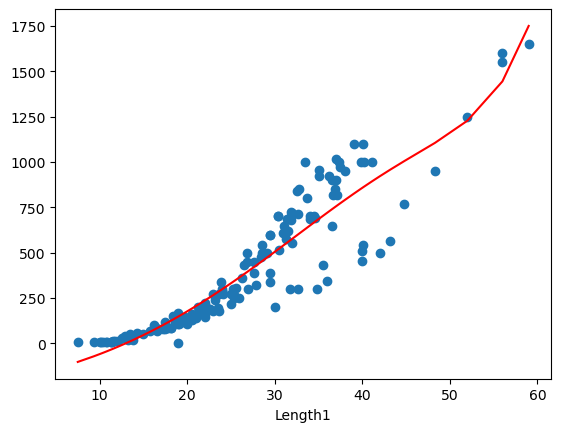

In [94]:
# Let's plot now!!

fig, ax = plt.subplots(1, 1)

ax.scatter(fish['Length1'],fish['Weight'])

sns.lineplot(x= fish['Length1'],y = predict_y(X_norm2,w_reg,b_reg),color='r')

# Great!! 
This seems a better model certainly. It's not as wiggly as before!! There is more stability here!

- Perhaps there would be even more stability in the curve if I increased the lambda value

In [95]:
# Let's compare the w values from the two models!
print(f"w without regularisation: {w_final}")
print(f"w after regularisation: {w_reg}")

w without regularisation: [-252.0201663   749.28930252  358.75320347 -230.42507555 -456.83112005
 -324.75817459  -40.97912127  203.12696231  291.64491643  176.18474339
 -147.23071218]
w after regularisation: [  95.25465706  229.82708016  135.02843886   -4.3162647   -89.45056144
 -106.54957611  -77.81116949  -28.96726681   21.57513732   63.38064557
   91.81183883]


In [103]:
pd.DataFrame(np.c_[w_final, w_reg], columns=['w wihtout reg', 'w with reg'])

,w wihtout reg,w with reg
0,-252.020166,95.254657
1,749.289303,229.827080
2,358.753203,135.028439
3,-230.425076,-4.316265
4,-456.831120,-89.450561
5,-324.758175,-106.549576
6,-40.979121,-77.811169
7,203.126962,-28.967267
8,291.644916,21.575137
9,176.184743,63.380646


We can see from above that weights have been adjusted when regularised. More weight is given to x squared and x cubed, compared to other features!!

# Now we need to use the Polynomial Regression using all the features!
- Which should be an easy extension now!!
- we would be increasing the number of features, using perhaps 2 and 3 polynomials per feature max (essentially doubling or tripling the number of features)

In [104]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [111]:
np.c_[fish.drop(['Species','Weight'],axis=1), fish.drop(['Species','Weight'],axis=1)**2]

array([[ 23.2       ,  25.4       ,  30.        , ..., 900.        ,
        132.7104    ,  16.1604    ],
       [ 24.        ,  26.3       ,  31.2       , ..., 973.44      ,
        155.7504    ,  18.53819136],
       [ 23.9       ,  26.5       ,  31.1       , ..., 967.21      ,
        153.20993284,  22.05335521],
       ...,
       [ 12.1       ,  13.        ,  13.8       , ..., 190.44      ,
          5.184729  ,   1.57703364],
       [ 13.2       ,  14.3       ,  15.2       , ..., 231.04      ,
          8.25297984,   4.27331584],
       [ 13.8       ,  15.        ,  16.2       , ..., 262.44      ,
          8.59779684,   3.53139264]])

In [118]:
X_poly = pd.merge(left=(pd.merge(left=fish.drop(['Species','Weight'],axis=1),right=fish.drop(['Species','Weight'],axis=1)**2,how='inner',suffixes=('','_squared'),left_index=True,right_index=True)),right=fish.drop(['Species','Weight'],axis=1)**3,how='inner',suffixes=('','_cubed'),left_index=True,right_index=True)

In [119]:
X_poly.head()

,Length1,Length2,Length3,Height,Width,Length1_squared,Length2_squared,Length3_squared,Height_squared,Width_squared,Length1_cubed,Length2_cubed,Length3_cubed,Height_cubed,Width_cubed
0,23.2,25.4,30.0,11.5200,4.0200,538.24,645.16,900.00,132.710400,16.160400,12487.168,16387.064,27000.000,1528.823808,64.964808
1,24.0,26.3,31.2,12.4800,4.3056,576.00,691.69,973.44,155.750400,18.538191,13824.000,18191.447,30371.328,1943.764992,79.818037
2,23.9,26.5,31.1,12.3778,4.6961,571.21,702.25,967.21,153.209933,22.053355,13651.919,18609.625,30080.231,1896.401907,103.564761
3,26.3,29.0,33.5,12.7300,4.4555,691.69,841.00,1122.25,162.052900,19.851480,18191.447,24389.000,37595.375,2062.933417,88.448270
4,26.5,29.0,34.0,12.4440,5.1340,702.25,841.00,1156.00,154.853136,26.357956,18609.625,24389.000,39304.000,1926.992424,135.321746


We can see that there are 5 features, which I have selected from the original dataset and created total 3 polynomial features per features -
- X raised to the power 1 
- X raised to the power 2
- X raised to the power 3

In [120]:
print(f"this has created {X_poly.shape[1]} features that will be used to predict weight of the fish")

this has created 15 features that will be used to predict weight of the fish


In [121]:
X.shape

(159, 3)

In [123]:
# Let's normalise the data first
X_poly_norm, X_poly_mu, X_poly_sigma = zscore_normalise(X_poly)

In [124]:
X_poly_norm.head()

,Length1,Length2,Length3,Height,Width,Length1_squared,Length2_squared,Length3_squared,Height_squared,Width_squared,Length1_cubed,Length2_cubed,Length3_cubed,Height_cubed,Width_cubed
0,-0.305789,-0.282303,-0.106020,0.596579,-0.236529,-0.417933,-0.401767,-0.262561,0.394058,-0.405272,-0.441892,-0.433358,-0.345319,0.185981,-0.493996
1,-0.225507,-0.198054,-0.002337,0.821261,-0.066579,-0.354802,-0.334135,-0.170335,0.661282,-0.249286,-0.399669,-0.387191,-0.275189,0.456912,-0.368971
2,-0.235542,-0.179332,-0.010977,0.797341,0.165793,-0.362810,-0.318786,-0.178158,0.631817,-0.018689,-0.405104,-0.376492,-0.281244,0.425987,-0.169087
3,0.005302,0.054694,0.196390,0.879771,0.022621,-0.161379,-0.117111,0.016541,0.734380,-0.163134,-0.261725,-0.228621,-0.124913,0.534722,-0.296328
4,0.025372,0.054694,0.239592,0.812835,0.426371,-0.143724,-0.117111,0.058924,0.650875,0.263697,-0.248517,-0.228621,-0.089370,0.445961,0.098222


# Without Regularisation

In [135]:
# Let's run gradient descent to find best values for w and b with the above features
# Without regularisation first!!
initial_w = np.zeros(X_poly_norm.shape[1])
initial_b = 0

alpha = 0.1
iterations = 50000

w_poly, b_poly, _ = gradient_descent(X_poly_norm.values,y_train,initial_w,initial_b,alpha,iterations,compute_cost,compute_gradient)

Iteration: 0, cost: 143003.22141509436, w: [32.67724795 32.78094827 32.93888538 25.84832269 31.63506117 32.5289198
 32.76852323 33.29590408 24.25735903 32.46147183 30.68330158 30.98629269
 31.83222045 22.13680347 31.76145379], b: 39.83264150943396
Iteration: 1000, cost: 1356.9246169165806, w: [ -9.24996615 -19.53894579 -54.21902528  26.00927573   5.42088191
  46.4293997   37.70669906   2.34839715  57.77830325  74.29120514
  73.01094627  63.70982494  29.74599316  20.17049111  66.06184379], b: 398.3264150943393
Iteration: 2000, cost: 1326.117998526185, w: [-3.41555296e-02 -1.89478544e+01 -7.83869036e+01  2.26520092e+01
  1.62527619e+00  6.55098840e+01  4.92439119e+01 -9.80216471e+00
  7.83831264e+01  9.29116579e+01  8.39736628e+01  6.60439358e+01
  9.10376654e+00  1.11064279e+01  4.83541790e+01], b: 398.3264150943393
Iteration: 3000, cost: 1306.1060362465203, w: [  6.33723524 -19.55805327 -95.77752033  17.12718519  -0.69881429
  79.49241883  57.32996731 -17.59489506  97.16472586 110.4926

Text(0.5, 1.0, 'Cost Plot')

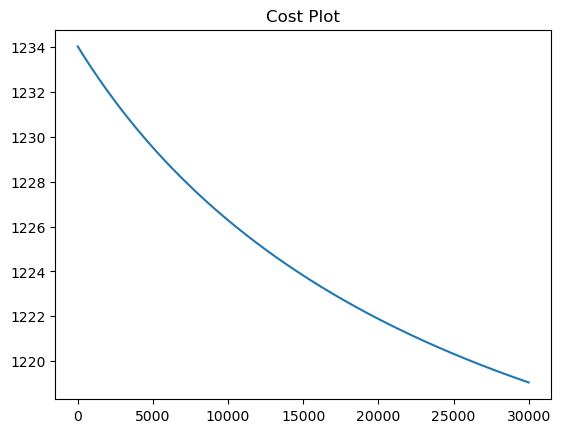

In [140]:
plt.plot(_[20000:])
plt.title('Cost Plot')

#1235 was the cost after 20000 iterations!
#it's 1219 after 50k iterations. So it's not decreasing drastically now

In [141]:
w_poly

array([  23.07805276,   16.29295016,  -84.49253695, -114.41865743,
        -73.83354391,   41.83111647,   27.13443513,  -93.03369357,
        360.73316542,  357.97752301,  217.81778343,  118.06298642,
       -106.77771496, -121.57425247, -141.62268589])

In [142]:
b_poly

398.3264150943393

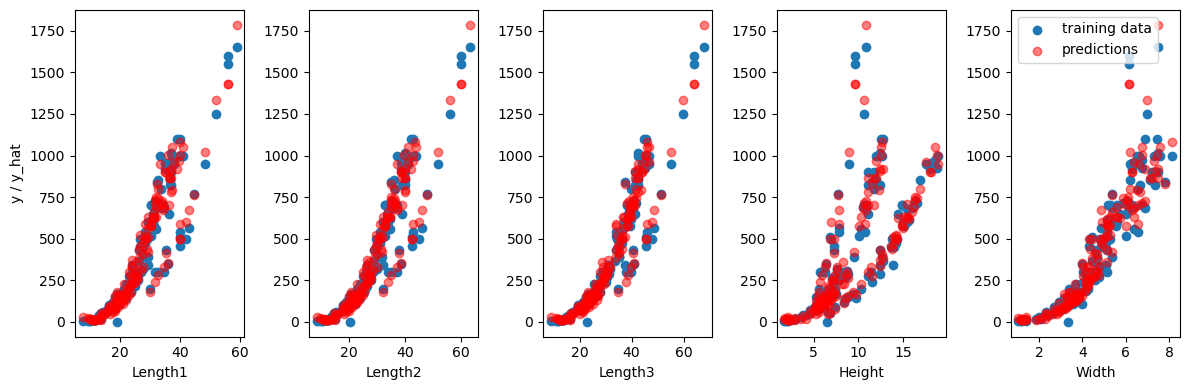

In [161]:
# Let's make predictions and plot the predictions against the training data
features = fish.drop(['Species','Weight'],axis=1).columns

fig, ax = plt.subplots(1,len(features), figsize=(12,4))

for i in range(len(features)):
    ax[i].scatter(fish[features[i]],y_train, label='training data')
    ax[i].scatter(fish[features[i]], predict_y(X_poly_norm.values,w_poly,b_poly),c='r', label='predictions',alpha=0.5)
    ax[i].set_xlabel(features[i])
ax[0].set_ylabel('y / y_hat')

plt.legend()
plt.tight_layout()

Text(0, 0.5, 'y_hat')

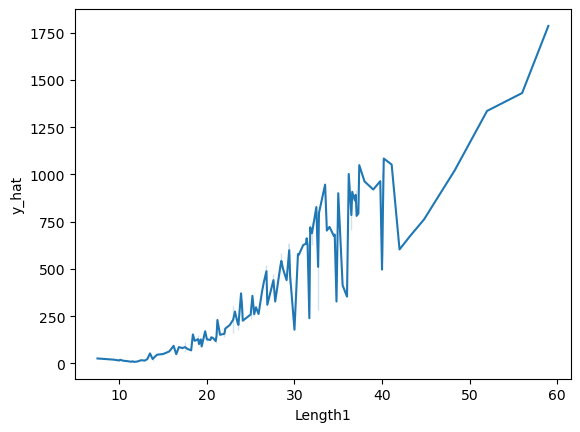

In [163]:
sns.lineplot(x=fish['Length1'], y=predict_y(X_poly_norm.values,w_poly,b_poly))
plt.ylabel('y_hat')

#Clearly we can see below that we are overfitting the data with this model (without regularisation)

Because we are using higher polynomials for each feature, we are able to fit the training data well. But maybe we are fitting the training data too well and it may not generalise to the test data. 

- That's why we need to use the regularisation term (lambda) to be able to ensure that the model doesn't have too high variance. This will help us reduce overfitting and we will have more generalisable model!!

# After Regularisation!

In [165]:
initial_w = np.zeros(X_poly_norm.shape[1])
initial_b = 0

alpha = 0.1
iterations = 50000
lmbda = 1

w_poly_reg, b_poly_reg, _ = gradient_descent_reg(X_poly_norm.values,y_train,initial_w,initial_b,alpha,iterations,compute_cost_reg,compute_gradient_reg,lmbda)

Iteration: 0, cost: 143003.22141509436, w: [32.67724795 32.78094827 32.93888538 25.84832269 31.63506117 32.5289198
 32.76852323 33.29590408 24.25735903 32.46147183 30.68330158 30.98629269
 31.83222045 22.13680347 31.76145379], b: 39.83264150943396
Iteration: 1000, cost: 1458.9781679740968, w: [-10.40404149 -18.04984119 -44.26347249  23.70665807   7.19599504
  40.38951225  34.07347227   7.13836165  51.47192294  68.77922771
  67.67756369  61.05389334  35.23580305  24.36459125  69.61787922], b: 398.3264150943393
Iteration: 2000, cost: 1453.754331833502, w: [ -6.69184605 -17.78844639 -53.98520829  22.46012242   5.64389161
  48.05843462  38.71881125   2.22464307  59.66538774  76.16189562
  72.08132399  62.00708001  26.93416547  20.73571411  62.5957181 ], b: 398.3264150943393
Iteration: 3000, cost: 1452.7985376576753, w: [ -5.32386677 -17.90716095 -57.7125818   21.30703344   5.14685412
  51.05172684  40.45429999   0.54414231  63.64196127  79.88061102
  73.85720953  62.27716945  23.72748905  

Text(0.5, 1.0, 'Cost Plot')

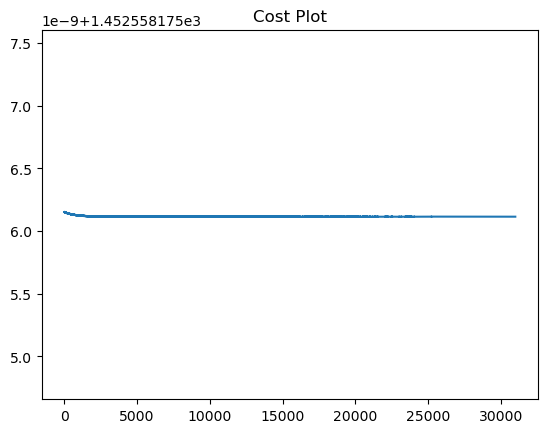

In [177]:
# The cost seems to have plateaud off early. at around 1452 as against ever decreasing cost of 1219 above (without reg)
# It's not decreasing as much as it was decreasing when we used gradient descent without regularisation term


plt.plot(_[19000:])
plt.title('Cost Plot')

# The cost is not decreasing after 19k iterations, as we can see below

In [178]:
w_poly_reg, b_poly_reg

(array([ -4.47799166, -18.23053697, -60.03249928,  19.81090843,
          4.65490674,  52.9974315 ,  41.46795988,  -0.32343029,
         67.50124797,  83.54201636,  75.18711145,  62.36006574,
         21.56301629,  17.25268268,  55.94239416]),
 398.3264150943393)

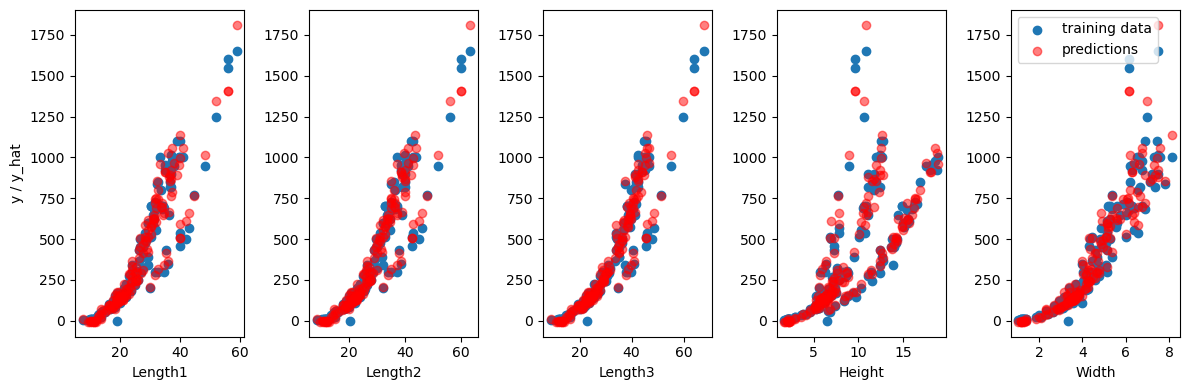

In [179]:
# Now let's plot the predictions against training data
# With regularisation

features = fish.drop(['Species','Weight'],axis=1).columns

fig, ax = plt.subplots(1,len(features), figsize=(12,4))

for i in range(len(features)):
    ax[i].scatter(fish[features[i]],y_train, label='training data')
    ax[i].scatter(fish[features[i]], predict_y(X_poly_norm.values,w_poly_reg,b_poly_reg),c='r', label='predictions',alpha=0.5)
    ax[i].set_xlabel(features[i])
ax[0].set_ylabel('y / y_hat')

plt.legend()
plt.tight_layout()

In [ ]:
# Damn!! The graph looks almost same as above!!
# Shall we experiment with higher values of lambda. Or is there something else at play
# okay I think it's because the y_hat predictions are based off all the features and not just one feature like Length 1

In [188]:
pd.DataFrame(np.c_[w_poly, w_poly_reg],columns=['without Reg', 'with Regularisation'])

,without Reg,with Regularisation
0,23.078053,-4.477992
1,16.292950,-18.230537
2,-84.492537,-60.032499
3,-114.418657,19.810908
4,-73.833544,4.654907
5,41.831116,52.997432
6,27.134435,41.467960
7,-93.033694,-0.323430
8,360.733165,67.501248
9,357.977523,83.542016


Above, we can clearly see that the two models have given different weights to various features

- so obviously the models are indeed very different!!

In [183]:
#np.c_[predict_y(X_poly_norm.values,w_poly_reg,b_poly_reg),predict_y(X_poly_norm.values,w_poly,b_poly)]

In [189]:
# Experiment with higher value for lambda!!

initial_w = np.zeros(X_poly_norm.shape[1])
initial_b = 0

alpha = 0.1
iterations = 20000
lmbda = 2

w_poly_reg_lmb, b_poly_reg_lmb, _ = gradient_descent_reg(X_poly_norm.values,y_train,initial_w,initial_b,alpha,iterations,compute_cost_reg,compute_gradient_reg,lmbda)

Iteration: 0, cost: 143003.22141509436, w: [32.67724795 32.78094827 32.93888538 25.84832269 31.63506117 32.5289198
 32.76852323 33.29590408 24.25735903 32.46147183 30.68330158 30.98629269
 31.83222045 22.13680347 31.76145379], b: 39.83264150943396
Iteration: 1000, cost: 1547.200780534698, w: [-10.76880524 -16.63112167 -37.10285835  21.94244729   8.51044025
  36.33750797  31.64743584  10.45497627  47.11115486  64.90558553
  63.72434729  58.90805179  38.65682009  27.24935123  71.64649691], b: 398.3264150943393
Iteration: 2000, cost: 1546.2091801847782, w: [ -9.2268455  -16.51362626 -41.13633028  21.46664525   7.85642773
  39.51671414  33.57637347   8.4061328   50.47357182  67.92655512
  65.54921693  59.30923179  35.21339191  25.74981016  68.772572  ], b: 398.3264150943393
Iteration: 3000, cost: 1546.158048087317, w: [ -8.92405234 -16.53734496 -41.95998417  21.2183098    7.74678608
  40.17740826  33.96036995   8.03264449  51.34214426  68.73802835
  65.94035887  59.36990515  34.50543225  2

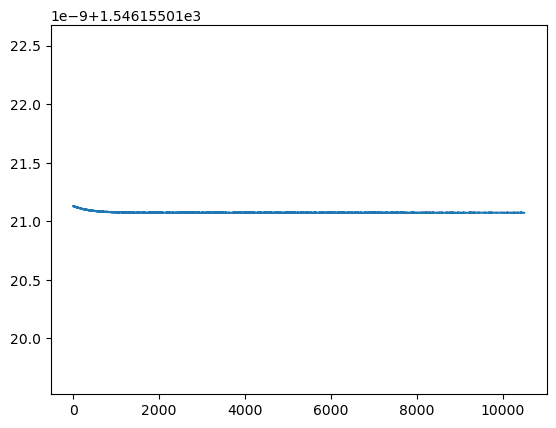

In [193]:
# With higher lambda, cost plateaud off even earlier!! So higher the regularisation, the earlier the cost plateaus off

plt.plot(_[9500:])

# After 9,500 iteration!

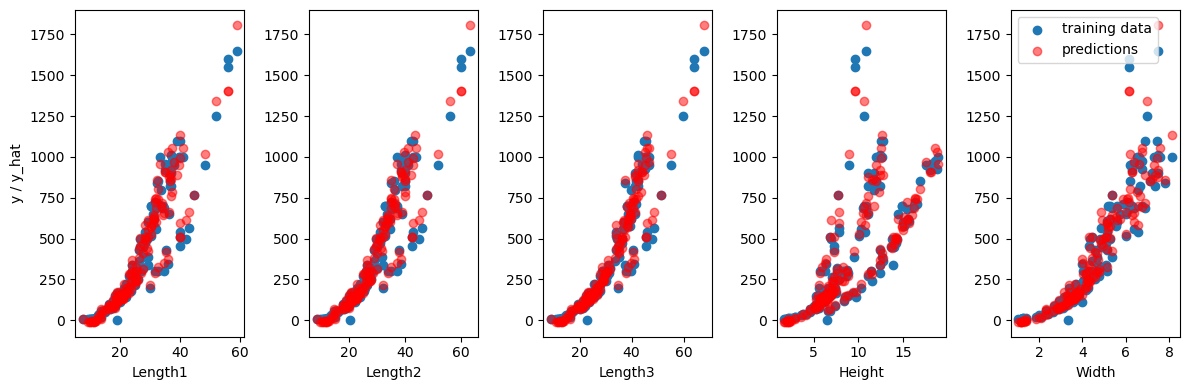

In [194]:
# Now let's plot the predictions against training data
# With higher regularisation lambda

features = fish.drop(['Species','Weight'],axis=1).columns

fig, ax = plt.subplots(1,len(features), figsize=(12,4))

for i in range(len(features)):
    ax[i].scatter(fish[features[i]],y_train, label='training data')
    ax[i].scatter(fish[features[i]], predict_y(X_poly_norm.values,w_poly_reg_lmb,b_poly_reg_lmb),c='r', label='predictions',alpha=0.5)
    ax[i].set_xlabel(features[i])
ax[0].set_ylabel('y / y_hat')

plt.legend()
plt.tight_layout()

The graph still seems to be similar to above (without regularisation, and with regularisation but small lambda)

- I think I should not conclude this to be that the model is overfitting (because as I observed above, we are taking on the x axis only one variable, but we are taking value on y axis from predictions of all variables /features)

- Rather I should conclude that the model is predicting well even after introducing regularisation and bigger lambda

- It is clear from below that regularisation is doing it's job of emphasising certain features and de-emphasising other features based on their predictive power

In [196]:
pd.DataFrame(np.c_[w_poly, w_poly_reg, w_poly_reg_lmb],columns=['w without Reg', 'w with Regularisation', 'w with Higher Regularisation'],index=X_poly.columns)

,w without Reg,w with Regularisation,w with Higher Regularisation
Length1,23.078053,-4.477992,-8.847856
Length2,16.292950,-18.230537,-16.561181
Length3,-84.492537,-60.032499,-42.171763
Height,-114.418657,19.810908,21.105002
Width,-73.833544,4.654907,7.709914
Length1_squared,41.831116,52.997432,40.353404
Length2_squared,27.134435,41.467960,34.055269
Length3_squared,-93.033694,-0.323430,7.950642
Height_squared,360.733165,67.501248,51.650631
Width_squared,357.977523,83.542016,69.030481


Bigger emphasis is on squared and cubed features after regularisation!!


It's also more balanced in its emphasis as compared to without Regularisation where too high or too low emphasis is given to features a bit erratically

# Well done!!

# Side Note on Polynomial Features -

## Easier was of fetching Polynomail features of some features and the logic behind them 

In [1]:
from sklearn.preprocessing import PolynomialFeatures

# Create a matrix of input features
X__ = [[1, 2], [3, 4], [5, 6]]

# Create a PolynomialFeatures object with degree 4
poly = PolynomialFeatures(4)

# Transform the input features to polynomial features
X_polynomail = poly.fit_transform(X__)

import pandas as pd
pd.DataFrame(X_polynomail)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,1.0,2.0,1.0,2.0,4.0,1.0,2.0,4.0,8.0,1.0,2.0,4.0,8.0,16.0
1,1.0,3.0,4.0,9.0,12.0,16.0,27.0,36.0,48.0,64.0,81.0,108.0,144.0,192.0,256.0
2,1.0,5.0,6.0,25.0,30.0,36.0,125.0,150.0,180.0,216.0,625.0,750.0,900.0,1080.0,1296.0


## Content of columns

$Column 0 = 1, Column 1= a, 2= b, 3= a square, 4= a * b, 5= b square, 6= a^3, 7= b * a square, 8= b sqaure * a, 9 = b^3, 10 = a^4, 11 = a^3 * b, 12 = b^2 * a^2, 13 = b^3 * a, 14 = b^4$

Generate a new feature matrix consisting of all polynomial combinations
of the features with degree less than or equal to the specified degree.
For example, if an input sample is two dimensional and of the form
[a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].


In [3]:
poly = PolynomialFeatures(6, interaction_only=True)

# Transform the input features to polynomial features
X_polynomail = poly.fit_transform(X__)

pd.DataFrame(X_polynomail)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,1.0,3.0,4.0,12.0
2,1.0,5.0,6.0,30.0


In [4]:
#only interaction features are produced above
# no polynomial features are inlcuded at all, however much I keep the polynomial in argument